In [1]:
import mylib.ICA as ica
import mylib.IO as io
import matplotlib.pyplot as plt
import scipy.io.wavfile as spwav
import numpy as np
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
# load the data from files
sound1 = spwav.read('report2_all/report2_kadai2_data1/speechA1.wav')[1]
sound2 = spwav.read('report2_all/report2_kadai2_data1/speechA2.wav')[1]
dataX = np.array((sound1,sound2))

#linear conversion of every dataX[i] so that E[dataX[i]] = 0
dataX, meanarr = ica.make_mean_0(dataX)
print(len(dataX[0]),len(dataX[1]))

102191 102191


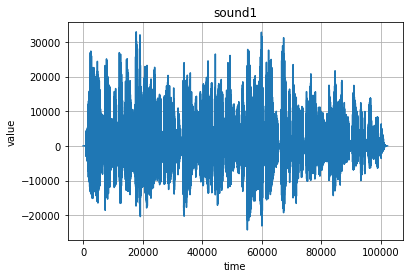

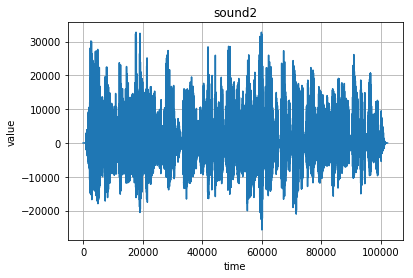

In [3]:
# show sound1
io.plot_graph(dataX[0], 'sound1', 'time')
plt.show()

# show sound2
io.plot_graph(dataX[1], 'sound2', 'time')
plt.show()

In [4]:
# whiten dataX
dataZ = ica.whitening_data(dataX)

# calculate a matrix W
mat_W = ica.make_W(dataZ, 2)

In [5]:
# calculate two source signals
source = ica.find_source(mat_W, dataZ)

# standardize each source
source = io.standardize_wav(source)

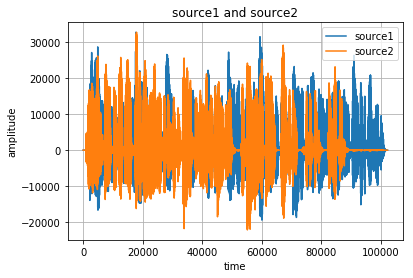

In [6]:
# show source
x_axis = np.arange(len(source[0]))
plt.plot(x_axis, source[0], label = 'source1')
plt.plot(x_axis, source[1], label = 'source2')
plt.title('source1 and source2')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.legend(loc = 'upper right')
plt.grid()
plt.show()

In [7]:
# write each source to a wavfile
spwav.write('separated_source/kadai2/kadai2_1/speaker1.wav', 8000, source[0])
spwav.write('separated_source/kadai2/kadai2_1/speaker2.wav', 8000, source[1])